# Power Analysis

In [1]:
# Import packages.
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm

In [2]:
# Define a function to extract observed introgression values.
def iua_obs_vals(n, f):
    # Define the path to the results. 
    path = '/users/dpeede/data/data/empirical_intro_stat_benchmarking/anc-der-intro-proj/simulations'
    # If the sample size is 1...
    if (n == 1):        
        # Define the file path for the results.
        results_path = path+'/sim_outputs/n_1/{0}/obs_vals/'.format(f)
        # Load observed site patterns.
        obs_abba = np.loadtxt(
            results_path+'abba.csv.gz',
            delimiter=',',
        )
        obs_baba = np.loadtxt(
            results_path+'baba.csv.gz',
            delimiter=',',
        )
        obs_baaa = np.loadtxt(
            results_path+'baaa.csv.gz',
            delimiter=',',
        )
        obs_abaa = np.loadtxt(
            results_path+'abaa.csv.gz',
            delimiter=',',
        )
        # Load observed introgression values.
        obs_d = np.loadtxt(
            results_path+'d.csv.gz',
            delimiter=',',
        )
        obs_danc = np.loadtxt(
            results_path+'danc.csv.gz',
            delimiter=',',
        )
        obs_dplus = np.loadtxt(
            results_path+'dplus.csv.gz',
            delimiter=',',
        )
        obs_fhom = np.loadtxt(
            results_path+'fhom.csv.gz',
            delimiter=',',
        )
        obs_fanc = np.loadtxt(
            results_path+'fanc.csv.gz',
            delimiter=',',
        )
        obs_fplus = np.loadtxt(
            results_path+'fplus.csv.gz',
            delimiter=',',
        )
    # Else...
    else:
        # Define the file path for the results.
        results_path = path+'/sim_outputs/n_100/{0}/obs_vals/rep_id_'.format(f)
        # Intialize obsrved value arrays.
        obs_abba = np.array([])
        obs_baba = np.array([])
        obs_baaa = np.array([])
        obs_abaa = np.array([])
        obs_d = np.array([])
        obs_danc = np.array([])
        obs_dplus = np.array([])
        obs_fhom = np.array([])
        obs_fanc = np.array([])
        obs_fplus = np.array([])
        # For all replicates.
        for rep_id in range(1, 101):
            # Load the observed values.
            site_patterns = np.loadtxt(
                results_path+'{0}_obs_site_patterns.csv.gz'.format(rep_id),
                delimiter=',',
            )
            detection = np.loadtxt(
                results_path+'{0}_obs_detection_metrics.csv.gz'.format(rep_id),
                delimiter=',',
            )
            quantification = np.loadtxt(
                results_path+'{0}_obs_quantification_metrics.csv.gz'.format(rep_id),
                delimiter=',',
            )
            # Append the observed value arrays.
            obs_abba = np.append(obs_abba, site_patterns[0])
            obs_baba = np.append(obs_baba, site_patterns[1])
            obs_baaa = np.append(obs_baaa, site_patterns[3])
            obs_abaa = np.append(obs_abaa, site_patterns[4])
            obs_d = np.append(obs_d, detection[0])
            obs_danc = np.append(obs_danc, detection[1])
            obs_dplus = np.append(obs_dplus, detection[2])
            obs_fhom = np.append(obs_fhom, quantification[0])
            obs_fanc = np.append(obs_fanc, quantification[1])
            obs_fplus = np.append(obs_fplus, quantification[2])
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    obs_vals_dict = {
        'abba': obs_abba, 'baaa': obs_baaa,
        'baba': obs_baba, 'abaa': obs_abaa,
        'd': obs_d,       'danc': obs_danc,
        'fhom': obs_fhom, 'fanc': obs_fanc,
        'dplus': obs_dplus, 'fplus': obs_fplus,
    }
    return obs_vals_dict

In [3]:
# Define a function to calculate the standard deviations of each bootstrapped distribution.
def iua_bs_stds(n, f):
    # Define the path to the results. 
    path = '/users/dpeede/data/data/empirical_intro_stat_benchmarking/anc-der-intro-proj/simulations'
    # Intialize bootstrapped standard deviation arrays.
    std_d = np.array([])
    std_danc = np.array([])
    std_dplus = np.array([])
    # Calculate the bootstrapped standard deviation for all replicate simulations.
    for rep_id in range(1, 101):
        # Define the file path for the results.
        results_path = path+'/sim_outputs/n_{0}/{1}/bootstraps/rep_id_{2}_'.format(n, f, rep_id)
        # Load the bootstrapped distributions.
        bs_abba = np.loadtxt(
            results_path+'abba.csv.gz',
            delimiter=',',
        )
        bs_baba = np.loadtxt(
            results_path+'baba.csv.gz',
            delimiter=',',
        )
        bs_baaa = np.loadtxt(
            results_path+'baaa.csv.gz',
            delimiter=',',
        )
        bs_abaa = np.loadtxt(
            results_path+'abaa.csv.gz',
            delimiter=',',
        )
        # Calculate bootstrapped introgression values.
        bs_d = ((bs_abba - bs_baba) / (bs_abba + bs_baba))
        bs_danc = ((bs_baaa - bs_abaa) / (bs_baaa + bs_abaa))
        bs_dplus = (((bs_abba - bs_baba) + (bs_baaa - bs_abaa)) / ((bs_abba + bs_baba) + (bs_baaa + bs_abaa)))
        # Calculate the standard deviations of each bootstrapped distribution.
        bs_std_d = np.std(bs_d)
        bs_std_danc = np.std(bs_danc)
        bs_std_dplus = np.std(bs_dplus)
        # Store the bootstrapped results for the replicate.
        std_d = np.append(std_d, bs_std_d)
        std_danc = np.append(std_danc, bs_std_danc)
        std_dplus = np.append(std_dplus, bs_std_dplus)
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    bs_std_dict = {
        'd': std_d, 'danc': std_danc, 'dplus': std_dplus,
    }
    return bs_std_dict

In [4]:
# Define a function to calculate p-values for introgression detection metrics.
def iua_p_values(n, f):
    # Load the observed values.
    obs_dict = iua_obs_vals(n, f)
    # Load the bootstrapped standard deviations.
    bs_dict = iua_bs_stds(n, f)
    # Use the survival function to calculate p-values.
    d_pval = norm.sf(x=abs(obs_dict['d']), loc=0, scale=bs_dict['d'])
    danc_pval = norm.sf(x=abs(obs_dict['danc']), loc=0, scale=bs_dict['danc'])
    dplus_pval = norm.sf(x=abs(obs_dict['dplus']), loc=0, scale=bs_dict['dplus'])
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    pval_dict = {
        'd': d_pval, 'danc': danc_pval, 'dplus': dplus_pval,
    }
    return pval_dict

In [5]:
# Define a function to calculate power for introgression detection metrics.
def iua_power(n, f):
    # Load the observed values.
    obs_dict = iua_obs_vals(n, f)
    # Load the bootstrapped standard deviations.
    bs_dict = iua_bs_stds(n, f)
    # Use the survival function to calculate p-values.
    d_pval = norm.sf(x=abs(obs_dict['d']), loc=0, scale=bs_dict['d'])
    danc_pval = norm.sf(x=abs(obs_dict['danc']), loc=0, scale=bs_dict['danc'])
    dplus_pval = norm.sf(x=abs(obs_dict['dplus']), loc=0, scale=bs_dict['dplus'])
    # Calculate the power ie the number of significant replicates out of 100.
    d_power = np.mean(d_pval < 0.05 )
    danc_power = np.mean(danc_pval < 0.05 )
    dplus_power = np.mean(dplus_pval < 0.05 )
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    power_dict = {
        'd': d_power, 'danc': danc_power, 'dplus': dplus_power,
    }
    return power_dict

In [6]:
# Define a function to extract observed introgression values.
def ragsdale_obs_vals(n, f, prefix):
    # Define the path to the results. 
    path = '/users/dpeede/data/data/empirical_intro_stat_benchmarking/anc-der-intro-proj/simulations'
    # If the sample size is 1...
    if (n == 1):        
        # Define the file path for the results.
        results_path = path+'/non_iua_models/ragsdale_2019/n_1/{0}/obs_vals/{1}_'.format(f, prefix)
        # Load observed site patterns.
        obs_abba = np.loadtxt(
            results_path+'abba.csv.gz',
            delimiter=',',
        )
        obs_baba = np.loadtxt(
            results_path+'baba.csv.gz',
            delimiter=',',
        )
        obs_baaa = np.loadtxt(
            results_path+'baaa.csv.gz',
            delimiter=',',
        )
        obs_abaa = np.loadtxt(
            results_path+'abaa.csv.gz',
            delimiter=',',
        )
        # Load observed introgression values.
        obs_d = np.loadtxt(
            results_path+'d.csv.gz',
            delimiter=',',
        )
        obs_danc = np.loadtxt(
            results_path+'danc.csv.gz',
            delimiter=',',
        )
        obs_dplus = np.loadtxt(
            results_path+'dplus.csv.gz',
            delimiter=',',
        )
        obs_fhom = np.loadtxt(
            results_path+'fhom.csv.gz',
            delimiter=',',
        )
        obs_fanc = np.loadtxt(
            results_path+'fanc.csv.gz',
            delimiter=',',
        )
        obs_fplus = np.loadtxt(
            results_path+'fplus.csv.gz',
            delimiter=',',
        )
    # Else...
    else:
        # Define the file path for the results.
        results_path = path+'/non_iua_models/ragsdale_2019/n_100/{0}/obs_vals/rep_id_'.format(f)
        # Intialize obsrved value arrays.
        obs_abba = np.array([])
        obs_baba = np.array([])
        obs_baaa = np.array([])
        obs_abaa = np.array([])
        obs_d = np.array([])
        obs_danc = np.array([])
        obs_dplus = np.array([])
        obs_fhom = np.array([])
        obs_fanc = np.array([])
        obs_fplus = np.array([])
        # For all replicates.
        for rep_id in range(1, 101):
            # Load the observed values.
            site_patterns = np.loadtxt(
                results_path+'{0}_{1}_site_patterns.csv.gz'.format(rep_id, prefix),
                delimiter=',',
            )
            detection = np.loadtxt(
                results_path+'{0}_{1}_detection_metrics.csv.gz'.format(rep_id, prefix),
                delimiter=',',
            )
            quantification = np.loadtxt(
                results_path+'{0}_{1}_quantification_metrics.csv.gz'.format(rep_id, prefix),
                delimiter=',',
            )
            # Append the observed value arrays.
            obs_abba = np.append(obs_abba, site_patterns[0])
            obs_baba = np.append(obs_baba, site_patterns[1])
            obs_baaa = np.append(obs_baaa, site_patterns[3])
            obs_abaa = np.append(obs_abaa, site_patterns[4])
            obs_d = np.append(obs_d, detection[0])
            obs_danc = np.append(obs_danc, detection[1])
            obs_dplus = np.append(obs_dplus, detection[2])
            obs_fhom = np.append(obs_fhom, quantification[0])
            obs_fanc = np.append(obs_fanc, quantification[1])
            obs_fplus = np.append(obs_fplus, quantification[2])
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    obs_vals_dict = {
        'abba': obs_abba, 'baaa': obs_baaa,
        'baba': obs_baba, 'abaa': obs_abaa,
        'd': obs_d,       'danc': obs_danc,
        'fhom': obs_fhom, 'fanc': obs_fanc,
        'dplus': obs_dplus, 'fplus': obs_fplus,
    }
    return obs_vals_dict

In [24]:
# Define a function to calculate the standard deviations of each bootstrapped distribution.
def ragsdale_bs_stds(n, f, prefix):
    # Define the path to the results. 
    path = '/users/dpeede/data/data/empirical_intro_stat_benchmarking/anc-der-intro-proj/simulations'
    # Intialize bootstrapped standard deviation arrays.
    std_d = np.array([])
    std_danc = np.array([])
    std_dplus = np.array([])
    # Calculate the bootstrapped standard deviation for all replicate simulations.
    for rep_id in range(1, 101):
        # Define the file path for the results.
        results_path = path+'/non_iua_models/ragsdale_2019/n_{0}/{1}/bootstraps/rep_id_{2}_{3}_'.format(n, f, rep_id, prefix)
        # Load the bootstrapped distributions.
        bs_abba = np.loadtxt(
            results_path+'abba.csv.gz',
            delimiter=',',
        )
        bs_baba = np.loadtxt(
            results_path+'baba.csv.gz',
            delimiter=',',
        )
        bs_baaa = np.loadtxt(
            results_path+'baaa.csv.gz',
            delimiter=',',
        )
        bs_abaa = np.loadtxt(
            results_path+'abaa.csv.gz',
            delimiter=',',
        )
        # Calculate bootstrapped introgression values.
        bs_d = ((bs_abba - bs_baba) / (bs_abba + bs_baba))
        bs_danc = ((bs_baaa - bs_abaa) / (bs_baaa + bs_abaa))
        bs_dplus = (((bs_abba - bs_baba) + (bs_baaa - bs_abaa)) / ((bs_abba + bs_baba) + (bs_baaa + bs_abaa)))
        # Calculate the standard deviations of each bootstrapped distribution.
        bs_std_d = np.std(bs_d)
        bs_std_danc = np.std(bs_danc)
        bs_std_dplus = np.std(bs_dplus)
        # Store the bootstrapped results for the replicate.
        std_d = np.append(std_d, bs_std_d)
        std_danc = np.append(std_danc, bs_std_danc)
        std_dplus = np.append(std_dplus, bs_std_dplus)
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    bs_std_dict = {
        'd': std_d, 'danc': std_danc, 'dplus': std_dplus,
    }
    return bs_std_dict

In [25]:
# Define a function to calculate p-values for introgression detection metrics.
def ragsdale_calc_p_values(n, f, prefix):
    # Load the observed values.
    obs_dict = ragsdale_obs_vals(n, f, prefix)
    # Load the bootstrapped standard deviations.
    bs_dict = ragsdale_bs_stds(n, f, prefix)
    # Use the survival function to calculate p-values.
    d_pval = norm.sf(x=abs(obs_dict['d']), loc=0, scale=bs_dict['d'])
    danc_pval = norm.sf(x=abs(obs_dict['danc']), loc=0, scale=bs_dict['danc'])
    dplus_pval = norm.sf(x=abs(obs_dict['dplus']), loc=0, scale=bs_dict['dplus'])
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    pval_dict = {
        'd': d_pval, 'danc': danc_pval, 'dplus': dplus_pval,
    }
    return pval_dict

In [26]:
# Define a function to calculate power for introgression detection metrics.
def ragsdale_calc_power(n, f, prefix):
    # Load the observed values.
    obs_dict = ragsdale_obs_vals(n, f, prefix)
    # Load the bootstrapped standard deviations.
    bs_dict = ragsdale_bs_stds(n, f, prefix)
    # Use the survival function to calculate p-values.
    d_pval = norm.sf(x=abs(obs_dict['d']), loc=0, scale=bs_dict['d'])
    danc_pval = norm.sf(x=abs(obs_dict['danc']), loc=0, scale=bs_dict['danc'])
    dplus_pval = norm.sf(x=abs(obs_dict['dplus']), loc=0, scale=bs_dict['dplus'])
    # Calculate the power ie the number of significant replicates out of 100.
    d_power = np.mean(d_pval < 0.05 )
    danc_power = np.mean(danc_pval < 0.05 )
    dplus_power = np.mean(dplus_pval < 0.05 )
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    power_dict = {
        'd': d_power, 'danc': danc_power, 'dplus': dplus_power,
    }
    return power_dict

In [27]:
# Load iua power values.
power_n1_f00 = iua_power(1, 0.0)
power_n1_f01 = iua_power(1, 0.01)
power_n1_f02 = iua_power(1, 0.02)
power_n1_f03 = iua_power(1, 0.03)
power_n1_f04 = iua_power(1, 0.04)
power_n1_f05 = iua_power(1, 0.05)
power_n1_f06 = iua_power(1, 0.06)
power_n1_f07 = iua_power(1, 0.07)
power_n1_f08 = iua_power(1, 0.08)
power_n1_f09 = iua_power(1, 0.09)
power_n1_f10 = iua_power(1, 0.1)
power_n1_f20 = iua_power(1, 0.2)
power_n1_f30 = iua_power(1, 0.3)
power_n1_f40 = iua_power(1, 0.4)
power_n1_f50 = iua_power(1, 0.5)
# Load iua power values.
power_n100_f00 = iua_power(100, 0.0)
power_n100_f01 = iua_power(100, 0.01)
power_n100_f02 = iua_power(100, 0.02)
power_n100_f03 = iua_power(100, 0.03)
power_n100_f04 = iua_power(100, 0.04)
power_n100_f05 = iua_power(100, 0.05)
power_n100_f06 = iua_power(100, 0.06)
power_n100_f07 = iua_power(100, 0.07)
power_n100_f08 = iua_power(100, 0.08)
power_n100_f09 = iua_power(100, 0.09)
power_n100_f10 = iua_power(100, 0.1)
power_n100_f20 = iua_power(100, 0.2)
power_n100_f30 = iua_power(100, 0.3)
power_n100_f40 = iua_power(100, 0.4)
power_n100_f50 = iua_power(100, 0.5)

In [28]:
# Load ceu power values.
ceu_power_n1_f00 = ragsdale_calc_power(1, 0.0, 'ceu')
ceu_power_n1_f01 = ragsdale_calc_power(1, 0.01, 'ceu')
ceu_power_n1_f02 = ragsdale_calc_power(1, 0.02, 'ceu')
ceu_power_n1_f03 = ragsdale_calc_power(1, 0.03, 'ceu')
ceu_power_n1_f04 = ragsdale_calc_power(1, 0.04, 'ceu')
ceu_power_n1_f05 = ragsdale_calc_power(1, 0.05, 'ceu')
ceu_power_n1_f06 = ragsdale_calc_power(1, 0.06, 'ceu')
ceu_power_n1_f07 = ragsdale_calc_power(1, 0.07, 'ceu')
ceu_power_n1_f08 = ragsdale_calc_power(1, 0.08, 'ceu')
ceu_power_n1_f09 = ragsdale_calc_power(1, 0.09, 'ceu')
ceu_power_n1_f10 = ragsdale_calc_power(1, 0.1, 'ceu')
ceu_power_n1_f20 = ragsdale_calc_power(1, 0.2, 'ceu')
ceu_power_n1_f30 = ragsdale_calc_power(1, 0.3, 'ceu')
ceu_power_n1_f40 = ragsdale_calc_power(1, 0.4, 'ceu')
ceu_power_n1_f50 = ragsdale_calc_power(1, 0.5, 'ceu')
ceu_power_n100_f00 = ragsdale_calc_power(100, 0.0, 'ceu')
ceu_power_n100_f01 = ragsdale_calc_power(100, 0.01, 'ceu')
ceu_power_n100_f02 = ragsdale_calc_power(100, 0.02, 'ceu')
ceu_power_n100_f03 = ragsdale_calc_power(100, 0.03, 'ceu')
ceu_power_n100_f04 = ragsdale_calc_power(100, 0.04, 'ceu')
ceu_power_n100_f05 = ragsdale_calc_power(100, 0.05, 'ceu')
ceu_power_n100_f06 = ragsdale_calc_power(100, 0.06, 'ceu')
ceu_power_n100_f07 = ragsdale_calc_power(100, 0.07, 'ceu')
ceu_power_n100_f08 = ragsdale_calc_power(100, 0.08, 'ceu')
ceu_power_n100_f09 = ragsdale_calc_power(100, 0.09, 'ceu')
ceu_power_n100_f10 = ragsdale_calc_power(100, 0.1, 'ceu')
ceu_power_n100_f20 = ragsdale_calc_power(100, 0.2, 'ceu')
ceu_power_n100_f30 = ragsdale_calc_power(100, 0.3, 'ceu')
ceu_power_n100_f40 = ragsdale_calc_power(100, 0.4, 'ceu')
ceu_power_n100_f50 = ragsdale_calc_power(100, 0.5, 'ceu')
# Load chb power values.
chb_power_n1_f00 = ragsdale_calc_power(1, 0.0, 'chb')
chb_power_n1_f01 = ragsdale_calc_power(1, 0.01, 'chb')
chb_power_n1_f02 = ragsdale_calc_power(1, 0.02, 'chb')
chb_power_n1_f03 = ragsdale_calc_power(1, 0.03, 'chb')
chb_power_n1_f04 = ragsdale_calc_power(1, 0.04, 'chb')
chb_power_n1_f05 = ragsdale_calc_power(1, 0.05, 'chb')
chb_power_n1_f06 = ragsdale_calc_power(1, 0.06, 'chb')
chb_power_n1_f07 = ragsdale_calc_power(1, 0.07, 'chb')
chb_power_n1_f08 = ragsdale_calc_power(1, 0.08, 'chb')
chb_power_n1_f09 = ragsdale_calc_power(1, 0.09, 'chb')
chb_power_n1_f10 = ragsdale_calc_power(1, 0.1, 'chb')
chb_power_n1_f20 = ragsdale_calc_power(1, 0.2, 'chb')
chb_power_n1_f30 = ragsdale_calc_power(1, 0.3, 'chb')
chb_power_n1_f40 = ragsdale_calc_power(1, 0.4, 'chb')
chb_power_n1_f50 = ragsdale_calc_power(1, 0.5, 'chb')
chb_power_n100_f00 = ragsdale_calc_power(100, 0.0, 'chb')
chb_power_n100_f01 = ragsdale_calc_power(100, 0.01, 'chb')
chb_power_n100_f02 = ragsdale_calc_power(100, 0.02, 'chb')
chb_power_n100_f03 = ragsdale_calc_power(100, 0.03, 'chb')
chb_power_n100_f04 = ragsdale_calc_power(100, 0.04, 'chb')
chb_power_n100_f05 = ragsdale_calc_power(100, 0.05, 'chb')
chb_power_n100_f06 = ragsdale_calc_power(100, 0.06, 'chb')
chb_power_n100_f07 = ragsdale_calc_power(100, 0.07, 'chb')
chb_power_n100_f08 = ragsdale_calc_power(100, 0.08, 'chb')
chb_power_n100_f09 = ragsdale_calc_power(100, 0.09, 'chb')
chb_power_n100_f10 = ragsdale_calc_power(100, 0.1, 'chb')
chb_power_n100_f20 = ragsdale_calc_power(100, 0.2, 'chb')
chb_power_n100_f30 = ragsdale_calc_power(100, 0.3, 'chb')
chb_power_n100_f40 = ragsdale_calc_power(100, 0.4, 'chb')
chb_power_n100_f50 = ragsdale_calc_power(100, 0.5, 'chb')

In [29]:
# Create power arrays for the D statistic.
all_n1_power_d = np.array([
    power_n1_f00['d'],
    power_n1_f01['d'],
    power_n1_f02['d'],
    power_n1_f03['d'],
    power_n1_f04['d'],
    power_n1_f05['d'],
    power_n1_f06['d'],
    power_n1_f07['d'],
    power_n1_f08['d'],
    power_n1_f09['d'],
    power_n1_f10['d'],
    power_n1_f20['d'],
    power_n1_f30['d'],
    power_n1_f40['d'],
    power_n1_f50['d'],
])
ceu_all_n1_power_d = np.array([
    ceu_power_n1_f00['d'],
    ceu_power_n1_f01['d'],
    ceu_power_n1_f02['d'],
    ceu_power_n1_f03['d'],
    ceu_power_n1_f04['d'],
    ceu_power_n1_f05['d'],
    ceu_power_n1_f06['d'],
    ceu_power_n1_f07['d'],
    ceu_power_n1_f08['d'],
    ceu_power_n1_f09['d'],
    ceu_power_n1_f10['d'],
    ceu_power_n1_f20['d'],
    ceu_power_n1_f30['d'],
    ceu_power_n1_f40['d'],
    ceu_power_n1_f50['d'],
])
chb_all_n1_power_d = np.array([
    chb_power_n1_f00['d'],
    chb_power_n1_f01['d'],
    chb_power_n1_f02['d'],
    chb_power_n1_f03['d'],
    chb_power_n1_f04['d'],
    chb_power_n1_f05['d'],
    chb_power_n1_f06['d'],
    chb_power_n1_f07['d'],
    chb_power_n1_f08['d'],
    chb_power_n1_f09['d'],
    chb_power_n1_f10['d'],
    chb_power_n1_f20['d'],
    chb_power_n1_f30['d'],
    chb_power_n1_f40['d'],
    chb_power_n1_f50['d'],
])
# Create power arrays for the Danc statistic.
all_n1_power_danc = np.array([
    power_n1_f00['danc'],
    power_n1_f01['danc'],
    power_n1_f02['danc'],
    power_n1_f03['danc'],
    power_n1_f04['danc'],
    power_n1_f05['danc'],
    power_n1_f06['danc'],
    power_n1_f07['danc'],
    power_n1_f08['danc'],
    power_n1_f09['danc'],
    power_n1_f10['danc'],
    power_n1_f20['danc'],
    power_n1_f30['danc'],
    power_n1_f40['danc'],
    power_n1_f50['danc'],
])
ceu_all_n1_power_danc = np.array([
    ceu_power_n1_f00['danc'],
    ceu_power_n1_f01['danc'],
    ceu_power_n1_f02['danc'],
    ceu_power_n1_f03['danc'],
    ceu_power_n1_f04['danc'],
    ceu_power_n1_f05['danc'],
    ceu_power_n1_f06['danc'],
    ceu_power_n1_f07['danc'],
    ceu_power_n1_f08['danc'],
    ceu_power_n1_f09['danc'],
    ceu_power_n1_f10['danc'],
    ceu_power_n1_f20['danc'],
    ceu_power_n1_f30['danc'],
    ceu_power_n1_f40['danc'],
    ceu_power_n1_f50['danc'],
])
chb_all_n1_power_danc = np.array([
    chb_power_n1_f00['danc'],
    chb_power_n1_f01['danc'],
    chb_power_n1_f02['danc'],
    chb_power_n1_f03['danc'],
    chb_power_n1_f04['danc'],
    chb_power_n1_f05['danc'],
    chb_power_n1_f06['danc'],
    chb_power_n1_f07['danc'],
    chb_power_n1_f08['danc'],
    chb_power_n1_f09['danc'],
    chb_power_n1_f10['danc'],
    chb_power_n1_f20['danc'],
    chb_power_n1_f30['danc'],
    chb_power_n1_f40['danc'],
    chb_power_n1_f50['danc'],
])
# Create power arrays for the D+ statistic.
all_n1_power_dplus = np.array([
    power_n1_f00['dplus'],
    power_n1_f01['dplus'],
    power_n1_f02['dplus'],
    power_n1_f03['dplus'],
    power_n1_f04['dplus'],
    power_n1_f05['dplus'],
    power_n1_f06['dplus'],
    power_n1_f07['dplus'],
    power_n1_f08['dplus'],
    power_n1_f09['dplus'],
    power_n1_f10['dplus'],
    power_n1_f20['dplus'],
    power_n1_f30['dplus'],
    power_n1_f40['dplus'],
    power_n1_f50['dplus'],
])
ceu_all_n1_power_dplus = np.array([
    ceu_power_n1_f00['dplus'],
    ceu_power_n1_f01['dplus'],
    ceu_power_n1_f02['dplus'],
    ceu_power_n1_f03['dplus'],
    ceu_power_n1_f04['dplus'],
    ceu_power_n1_f05['dplus'],
    ceu_power_n1_f06['dplus'],
    ceu_power_n1_f07['dplus'],
    ceu_power_n1_f08['dplus'],
    ceu_power_n1_f09['dplus'],
    ceu_power_n1_f10['dplus'],
    ceu_power_n1_f20['dplus'],
    ceu_power_n1_f30['dplus'],
    ceu_power_n1_f40['dplus'],
    ceu_power_n1_f50['dplus'],
])
chb_all_n1_power_dplus = np.array([
    chb_power_n1_f00['dplus'],
    chb_power_n1_f01['dplus'],
    chb_power_n1_f02['dplus'],
    chb_power_n1_f03['dplus'],
    chb_power_n1_f04['dplus'],
    chb_power_n1_f05['dplus'],
    chb_power_n1_f06['dplus'],
    chb_power_n1_f07['dplus'],
    chb_power_n1_f08['dplus'],
    chb_power_n1_f09['dplus'],
    chb_power_n1_f10['dplus'],
    chb_power_n1_f20['dplus'],
    chb_power_n1_f30['dplus'],
    chb_power_n1_f40['dplus'],
    chb_power_n1_f50['dplus'],
])

In [30]:
# Create power arrays for the D statistic.
all_n100_power_d = np.array([
    power_n100_f00['d'],
    power_n100_f01['d'],
    power_n100_f02['d'],
    power_n100_f03['d'],
    power_n100_f04['d'],
    power_n100_f05['d'],
    power_n100_f06['d'],
    power_n100_f07['d'],
    power_n100_f08['d'],
    power_n100_f09['d'],
    power_n100_f10['d'],
    power_n100_f20['d'],
    power_n100_f30['d'],
    power_n100_f40['d'],
    power_n100_f50['d'],
])
ceu_all_n100_power_d = np.array([
    ceu_power_n100_f00['d'],
    ceu_power_n100_f01['d'],
    ceu_power_n100_f02['d'],
    ceu_power_n100_f03['d'],
    ceu_power_n100_f04['d'],
    ceu_power_n100_f05['d'],
    ceu_power_n100_f06['d'],
    ceu_power_n100_f07['d'],
    ceu_power_n100_f08['d'],
    ceu_power_n100_f09['d'],
    ceu_power_n100_f10['d'],
    ceu_power_n100_f20['d'],
    ceu_power_n100_f30['d'],
    ceu_power_n100_f40['d'],
    ceu_power_n100_f50['d'],
])
chb_all_n100_power_d = np.array([
    chb_power_n100_f00['d'],
    chb_power_n100_f01['d'],
    chb_power_n100_f02['d'],
    chb_power_n100_f03['d'],
    chb_power_n100_f04['d'],
    chb_power_n100_f05['d'],
    chb_power_n100_f06['d'],
    chb_power_n100_f07['d'],
    chb_power_n100_f08['d'],
    chb_power_n100_f09['d'],
    chb_power_n100_f10['d'],
    chb_power_n100_f20['d'],
    chb_power_n100_f30['d'],
    chb_power_n100_f40['d'],
    chb_power_n100_f50['d'],
])
# Create power arrays for the Danc statistic.
all_n100_power_danc = np.array([
    power_n100_f00['danc'],
    power_n100_f01['danc'],
    power_n100_f02['danc'],
    power_n100_f03['danc'],
    power_n100_f04['danc'],
    power_n100_f05['danc'],
    power_n100_f06['danc'],
    power_n100_f07['danc'],
    power_n100_f08['danc'],
    power_n100_f09['danc'],
    power_n100_f10['danc'],
    power_n100_f20['danc'],
    power_n100_f30['danc'],
    power_n100_f40['danc'],
    power_n100_f50['danc'],
])
ceu_all_n100_power_danc = np.array([
    ceu_power_n100_f00['danc'],
    ceu_power_n100_f01['danc'],
    ceu_power_n100_f02['danc'],
    ceu_power_n100_f03['danc'],
    ceu_power_n100_f04['danc'],
    ceu_power_n100_f05['danc'],
    ceu_power_n100_f06['danc'],
    ceu_power_n100_f07['danc'],
    ceu_power_n100_f08['danc'],
    ceu_power_n100_f09['danc'],
    ceu_power_n100_f10['danc'],
    ceu_power_n100_f20['danc'],
    ceu_power_n100_f30['danc'],
    ceu_power_n100_f40['danc'],
    ceu_power_n100_f50['danc'],
])
chb_all_n100_power_danc = np.array([
    chb_power_n100_f00['danc'],
    chb_power_n100_f01['danc'],
    chb_power_n100_f02['danc'],
    chb_power_n100_f03['danc'],
    chb_power_n100_f04['danc'],
    chb_power_n100_f05['danc'],
    chb_power_n100_f06['danc'],
    chb_power_n100_f07['danc'],
    chb_power_n100_f08['danc'],
    chb_power_n100_f09['danc'],
    chb_power_n100_f10['danc'],
    chb_power_n100_f20['danc'],
    chb_power_n100_f30['danc'],
    chb_power_n100_f40['danc'],
    chb_power_n100_f50['danc'],
])
# Create power arrays for the D+ statistic.
all_n100_power_dplus = np.array([
    power_n100_f00['dplus'],
    power_n100_f01['dplus'],
    power_n100_f02['dplus'],
    power_n100_f03['dplus'],
    power_n100_f04['dplus'],
    power_n100_f05['dplus'],
    power_n100_f06['dplus'],
    power_n100_f07['dplus'],
    power_n100_f08['dplus'],
    power_n100_f09['dplus'],
    power_n100_f10['dplus'],
    power_n100_f20['dplus'],
    power_n100_f30['dplus'],
    power_n100_f40['dplus'],
    power_n100_f50['dplus'],
])
ceu_all_n100_power_dplus = np.array([
    ceu_power_n100_f00['dplus'],
    ceu_power_n100_f01['dplus'],
    ceu_power_n100_f02['dplus'],
    ceu_power_n100_f03['dplus'],
    ceu_power_n100_f04['dplus'],
    ceu_power_n100_f05['dplus'],
    ceu_power_n100_f06['dplus'],
    ceu_power_n100_f07['dplus'],
    ceu_power_n100_f08['dplus'],
    ceu_power_n100_f09['dplus'],
    ceu_power_n100_f10['dplus'],
    ceu_power_n100_f20['dplus'],
    ceu_power_n100_f30['dplus'],
    ceu_power_n100_f40['dplus'],
    ceu_power_n100_f50['dplus'],
])
chb_all_n100_power_dplus = np.array([
    chb_power_n100_f00['dplus'],
    chb_power_n100_f01['dplus'],
    chb_power_n100_f02['dplus'],
    chb_power_n100_f03['dplus'],
    chb_power_n100_f04['dplus'],
    chb_power_n100_f05['dplus'],
    chb_power_n100_f06['dplus'],
    chb_power_n100_f07['dplus'],
    chb_power_n100_f08['dplus'],
    chb_power_n100_f09['dplus'],
    chb_power_n100_f10['dplus'],
    chb_power_n100_f20['dplus'],
    chb_power_n100_f30['dplus'],
    chb_power_n100_f40['dplus'],
    chb_power_n100_f50['dplus'],
])

In [31]:
# Intialize an array of all admixture proportions.
all_admix_props = np.array([
    r'$f = 0$', r'$f = 0.01$', r'$f = 0.02$',
    r'$f = 0.03$', r'$f = 0.04$', r'$f = 0.05$',
    r'$f = 0.06$', r'$f = 0.07$', r'$f = 0.08$',
    r'$f = 0.09$', r'$f = 0.1$', r'$f = 0.2$',
    r'$f = 0.3$', r'$f = 0.4$', r'$f = 0.5$',
])
# Create a pandas dataframe for the all power results.
all_n1_power_df = pd.DataFrame(
    data={
        r'$D$ (IUA)': all_n1_power_d,
        r'$D_{anc}$  (IUA)': all_n1_power_danc,
        r'$D+$ (IUA)': all_n1_power_dplus,
        r'$D$ (CEU)': ceu_all_n1_power_d,
        r'$D_{anc}$  (CEU)': ceu_all_n1_power_danc,
        r'$D+$ (CEU)': ceu_all_n1_power_dplus,
        r'$D$ (CHB)': chb_all_n1_power_d,
        r'$D_{anc}$  (CHB)': chb_all_n1_power_danc,
        r'$D+$ (CHB)': chb_all_n1_power_dplus,
    },
    index=all_admix_props,
)
all_n100_power_df = pd.DataFrame(
    data={
        r'$D$ (IUA)': all_n100_power_d,
        r'$D_{anc}$  (IUA)': all_n100_power_danc,
        r'$D+$ (IUA)': all_n100_power_dplus,
        r'$D$ (CEU)': ceu_all_n100_power_d,
        r'$D_{anc}$  (CEU)': ceu_all_n100_power_danc,
        r'$D+$ (CEU)': ceu_all_n100_power_dplus,
        r'$D$ (CHB)': chb_all_n100_power_d,
        r'$D_{anc}$  (CHB)': chb_all_n100_power_danc,
        r'$D+$ (CHB)': chb_all_n100_power_dplus,
    },
    index=all_admix_props,
)

In [32]:
# Power results for 1 sample.
all_n1_power_df

,$D$ (IUA),$D_{anc}$ (IUA),$D+$ (IUA),$D$ (CEU),$D_{anc}$ (CEU),$D+$ (CEU),$D$ (CHB),$D_{anc}$ (CHB),$D+$ (CHB)
$f = 0$,0.13,0.07,0.08,0.13,0.11,0.13,0.16,0.07,0.11
$f = 0.01$,0.34,0.27,0.34,0.54,0.25,0.44,0.49,0.26,0.36
$f = 0.02$,0.56,0.39,0.52,0.87,0.46,0.66,0.91,0.54,0.76
$f = 0.03$,0.87,0.63,0.86,1.00,0.78,0.89,0.97,0.77,0.87
$f = 0.04$,0.96,0.89,0.95,1.00,0.88,0.94,1.00,0.86,0.95
$f = 0.05$,0.99,0.92,0.99,1.00,0.93,1.00,1.00,0.91,0.97
$f = 0.06$,1.00,0.95,1.00,1.00,0.98,0.99,1.00,0.97,0.99
$f = 0.07$,1.00,0.97,1.00,1.00,1.00,1.00,1.00,1.00,1.00
$f = 0.08$,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
$f = 0.09$,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [33]:
# Power results for 100 samples.
all_n100_power_df

,$D$ (IUA),$D_{anc}$ (IUA),$D+$ (IUA),$D$ (CEU),$D_{anc}$ (CEU),$D+$ (CEU),$D$ (CHB),$D_{anc}$ (CHB),$D+$ (CHB)
$f = 0$,0.11,0.08,0.10,0.0,0.00,0.00,0.00,0.00,0.00
$f = 0.01$,0.66,0.50,0.60,0.6,0.20,0.39,0.69,0.18,0.47
$f = 0.02$,0.98,0.88,0.96,1.0,0.54,0.85,0.96,0.50,0.83
$f = 0.03$,1.00,0.98,1.00,1.0,0.90,1.00,1.00,0.90,0.98
$f = 0.04$,1.00,1.00,1.00,1.0,0.98,1.00,1.00,0.93,0.98
$f = 0.05$,1.00,1.00,1.00,1.0,1.00,1.00,1.00,0.99,1.00
$f = 0.06$,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00
$f = 0.07$,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00
$f = 0.08$,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00
$f = 0.09$,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00


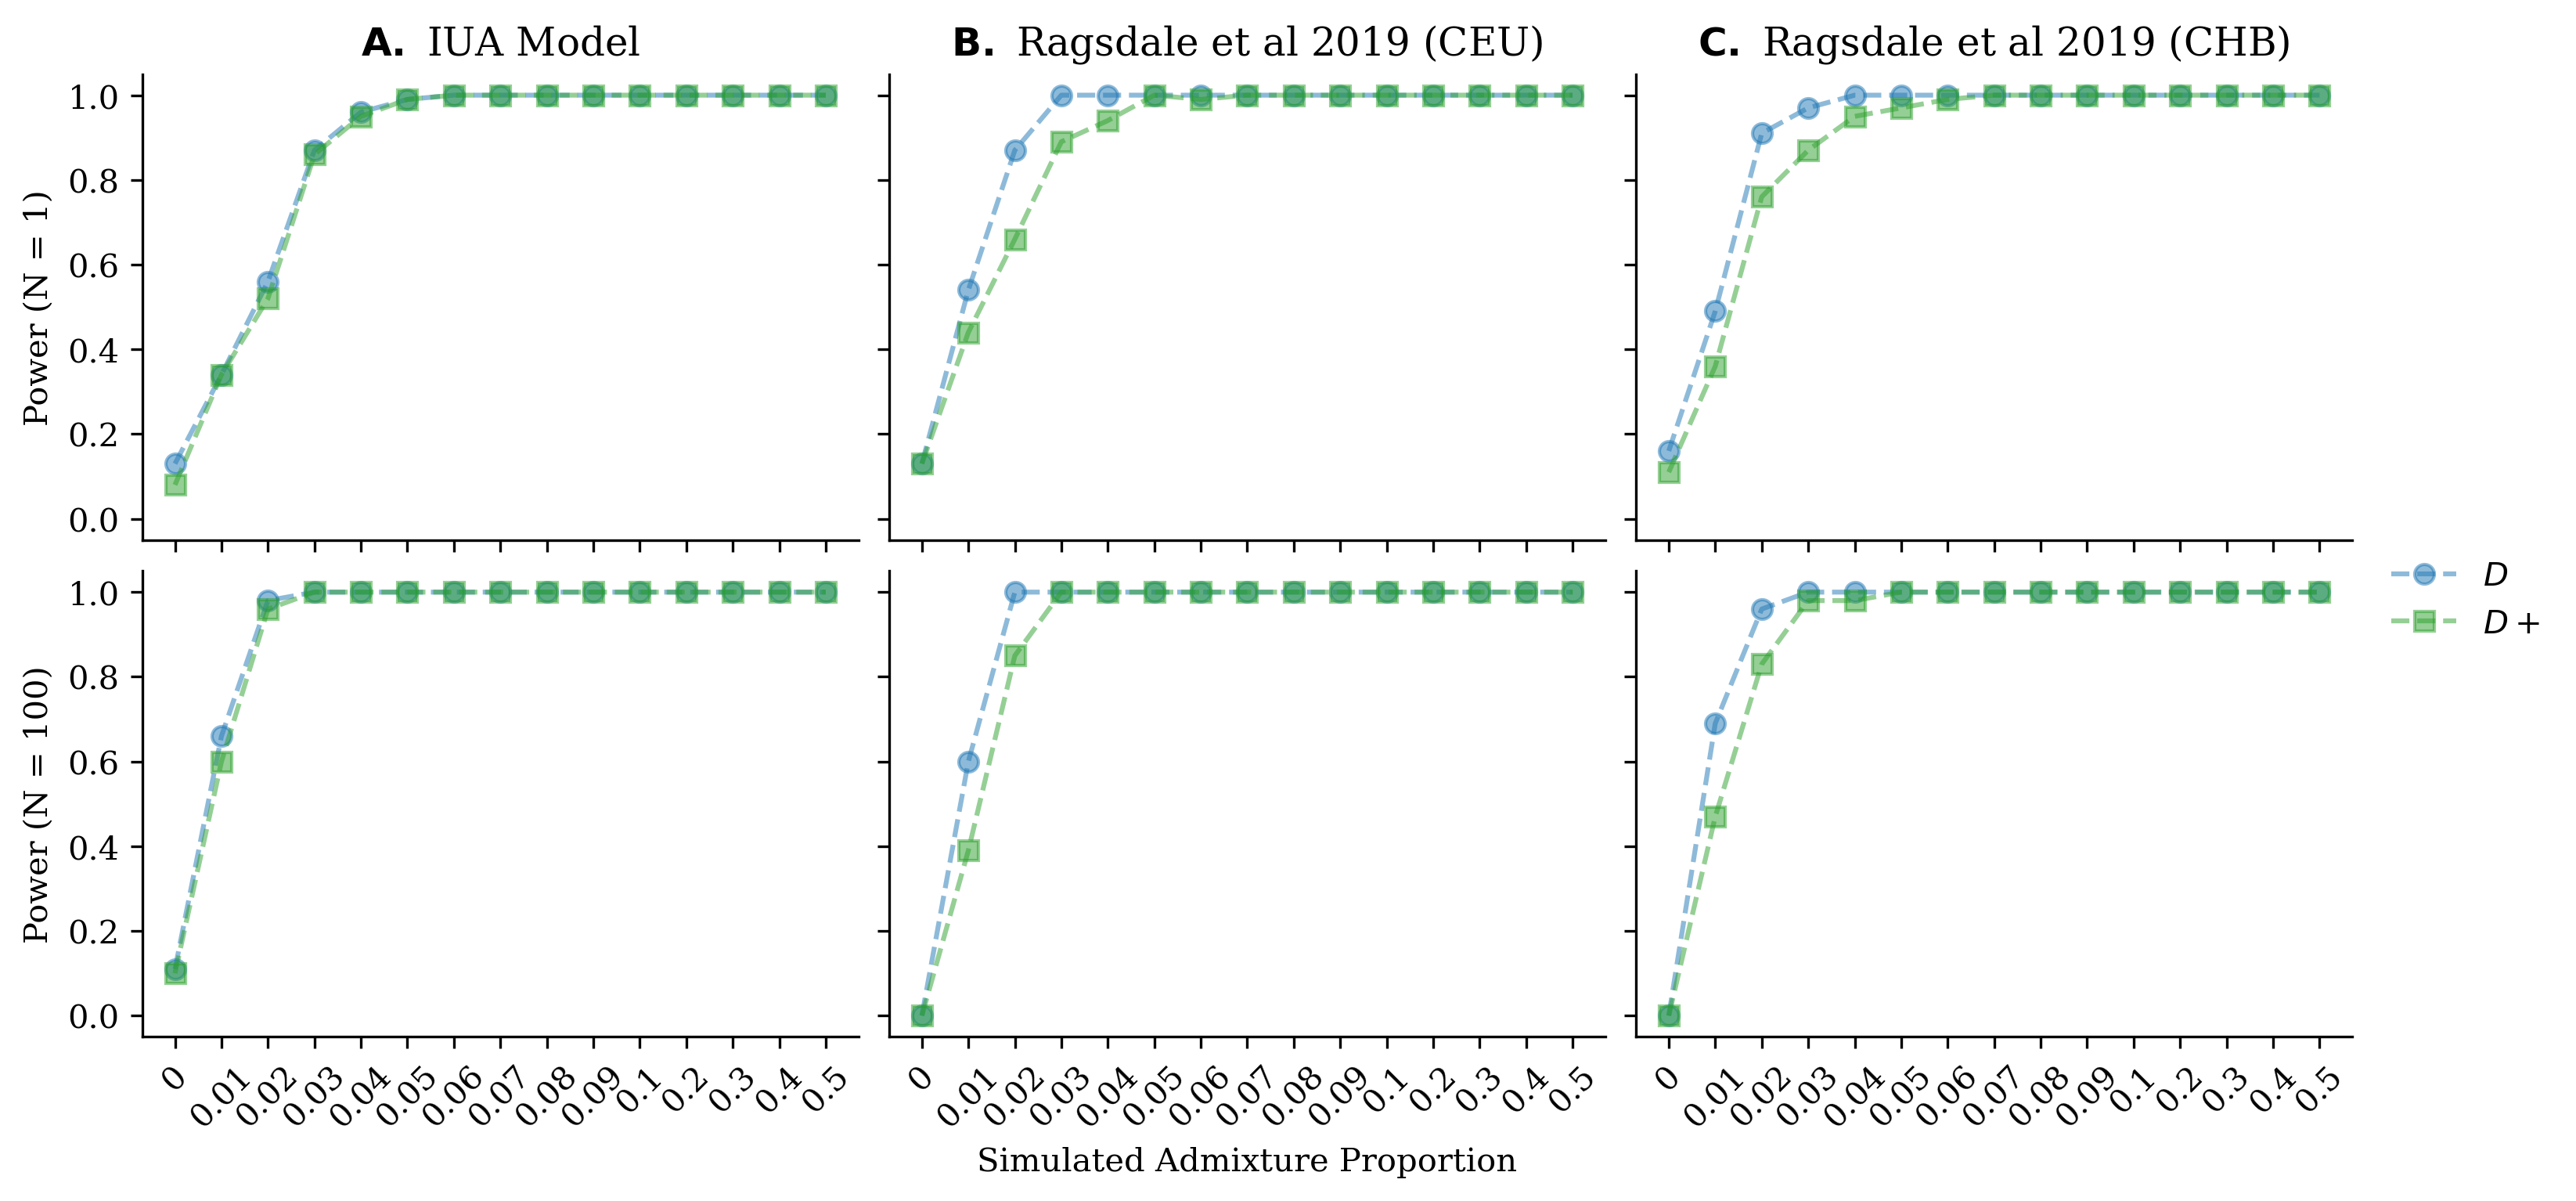

In [34]:
# Intialize list of x-axis tick labels.
all_x_ticks = [
    '0', '0.01', '0.02',
    '0.03', '0.04', '0.05',
    '0.06', '0.07', '0.08',
    '0.09', '0.1', '0.2',
    '0.3', '0.4', '0.5',
]
# Intialize the style.
plt.rcParams.update({'font.family': 'serif', 'font.size': 10})
# Intialize the figure.
fig, axes = plt.subplots(
    2, 3, figsize=(10, 5), dpi=300.0, sharex=True, sharey=True,
    facecolor='white', constrained_layout=True,
)
# Plot the IUA results.
axes[0, 0].plot(np.arange(15), all_n1_power_d, '--o', alpha=0.5, color='tab:blue')
#axes[0, 0].plot(np.arange(15), all_n1_power_danc, '--^', alpha=0.5)
axes[0, 0].plot(np.arange(15), all_n1_power_dplus, '--s', alpha=0.5, color='tab:green')
axes[1, 0].plot(np.arange(15), all_n100_power_d, '--o', alpha=0.5, color='tab:blue')
#axes[1, 0].plot(np.arange(15), all_n100_power_danc, '--^', alpha=0.5)
axes[1, 0].plot(np.arange(15), all_n100_power_dplus, '--s', alpha=0.5, color='tab:green')
# Plot the CEU results.
axes[0, 1].plot(np.arange(15), ceu_all_n1_power_d, '--o', alpha=0.5, color='tab:blue')
#axes[0, 1].plot(np.arange(15), ceu_all_n1_power_danc, '--^', alpha=0.5)
axes[0, 1].plot(np.arange(15), ceu_all_n1_power_dplus, '--s', alpha=0.5, color='tab:green')
axes[1, 1].plot(np.arange(15), ceu_all_n100_power_d, '--o', alpha=0.5, color='tab:blue')
#axes[1, 1].plot(np.arange(15), ceu_all_n100_power_danc, '--^', alpha=0.5)
axes[1, 1].plot(np.arange(15), ceu_all_n100_power_dplus, '--s', alpha=0.5, color='tab:green')
# Plot the CHB results.
axes[0, 2].plot(np.arange(15), chb_all_n1_power_d, '--o', alpha=0.5, color='tab:blue')
#axes[0, 2].plot(np.arange(15), chb_all_n1_power_danc, '--^', alpha=0.5)
axes[0, 2].plot(np.arange(15), chb_all_n1_power_dplus, '--s', alpha=0.5, color='tab:green')
axes[1, 2].plot(np.arange(15), chb_all_n100_power_d, '--o', alpha=0.5, color='tab:blue', label=r'$D$')
#axes[1, 2].plot(np.arange(15), chb_all_n100_power_danc, '--^', alpha=0.5, label=r'$D_{anc}$')
axes[1, 2].plot(np.arange(15), chb_all_n100_power_dplus, '--s', alpha=0.5, color='tab:green', label=r'$D+$')
# Title each subplot.
axes[0, 0].set_title(r'$\bf{A.}$'+' IUA Model')
axes[0, 1].set_title(r'$\bf{B.}$'+' Ragsdale et al 2019 (CEU)')
axes[0, 2].set_title(r'$\bf{C.}$'+' Ragsdale et al 2019 (CHB)')
# Add a figure lgend.
fig.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
# Despine the axes.
axes[0, 0].spines['top'].set_visible(False)
axes[0, 0].spines['right'].set_visible(False)
axes[0, 1].spines['top'].set_visible(False)
axes[0, 1].spines['right'].set_visible(False)
axes[0, 2].spines['top'].set_visible(False)
axes[0, 2].spines['right'].set_visible(False)
axes[1, 0].spines['top'].set_visible(False)
axes[1, 0].spines['right'].set_visible(False)
axes[1, 1].spines['top'].set_visible(False)
axes[1, 1].spines['right'].set_visible(False)
axes[1, 2].spines['top'].set_visible(False)
axes[1, 2].spines['right'].set_visible(False)
# Label the axes.
axes[1, 1].set_xlabel('Simulated Admixture Proportion')
axes[0, 0].set_ylabel('Power (N = 1)')
axes[1, 0].set_ylabel('Power (N = 100)')
# Set and label the axes ticks.
axes[1, 0].set_xticks(np.arange(15))
axes[1, 0].set_xticklabels(all_x_ticks, rotation=45)
axes[1, 1].set_xticks(np.arange(15))
axes[1, 1].set_xticklabels(all_x_ticks, rotation=45)
axes[1, 2].set_xticks(np.arange(15))
axes[1, 2].set_xticklabels(all_x_ticks, rotation=45)
# Show the plot!
plt.show()